<a href="https://colab.research.google.com/github/TailUFPB/Tutorials/blob/main/Pycaret/code2_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução a classificação com Pycaret**

Apresentação da biblioteca Pycaret com ênfase em problemas de clasificação

# **Importando as bibliotecas necessárias**

In [17]:
!pip install pycaret;
!pip install shap;

     |████████████████████████████████| 71kB 3.4MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [18]:
import numpy as np
import pandas as pd
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# **Importando os dados do problema (Dataset)**

Para exemplo, utilizaremos o dataset [Mushrooms](https://www.kaggle.com/uciml/mushroom-classification?select=mushrooms.csv), cujo o objetivo é classificar por meio dos atributos se o cogumelo é venenoso ou comestível.

In [19]:
data = pd.read_csv("https://raw.githubusercontent.com/hugo451/Dados/master/mushrooms.csv")
display(data)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [20]:
data.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,o,c,l


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# **Preprocessamento dos dados**

Nesse estágio, utilizaremos a função "setup" presente na biblioteca Pycaret

# **Função Setup (Pycaret)**

Essa função vai fazer o pré processamento dos dados para a entrada dos dados no modelo. São necessários alguns parâmetros, como o "data" que é a base de dados que será utilizada e o "target" que é a coluna de resposta do dataset, ou seja, a que o modelo terá que predizer. Existem outros parâmetros que são setados automaticamente nessa função, mas você pode alterá-los, como por exemplo os parâmetros "train_size" e "categorical_features" que foi alterados para exemplo e melhor performance.



*   Referência: [LINKt](https://pycaret.org/preprocessing/)



In [22]:
clf = setup(data=data,
            target="class",
            train_size=0.7,
            categorical_features=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                                  'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                                  'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                                  'stalk-surface-below-ring', 'stalk-color-above-ring',
                                  'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
                                  'ring-type', 'spore-print-color', 'population', 'habitat'],
            silent = True)

,Description,Value
0,session_id,8462
1,Target,class
2,Target Type,Binary
3,Label Encoded,"e: 0, p: 1"
4,Original Data,"(8124, 23)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,22
8,Ordinal Features,False
9,High Cardinality Features,False


# **Comparando modelos de classificação**

Na biblioteca Pycaret temos a função "compare_models" que nos mostra a performance dos modelos em relação a minha base de dados já pré processada. Ou seja, nos mostra com as principais métricas de avaliação para modelos de classifiação como alguns dos principais modelos utilizados pela comunidade de IA no mundo performam em relação a nossa base de dados.



*   Referência: [LINK](https://pycaret.org/classification/)



In [23]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.931
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.040
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.610
qda,Quadratic Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.079
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.348
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.863
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.574
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.142
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.134
catboost,CatBoost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3.095


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

# **Criação do modelo**

Para criação do modelo utilizaremos a função "create_model" e passando como parâmetro o ID do modelo que queremos utilizar. No exemplo abaixo, utilizaremos o modelo Naive Bayes de ID "nb". Você pode checar o ID de cada modelo checando a documentação no link abaixo ou visualizar na tabela mostrada pela função "compare_models".



*   [Naive Bayes](https://www.datageeks.com.br/naive-bayes/)
*   [Modelos de Classificação Pycaret](https://pycaret.org/classification/)





In [33]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8418,0.9128,0.8475,0.8809,0.8387,0.6869,0.7233
1,0.8225,0.9227,0.8283,0.8625,0.8188,0.6488,0.6856
2,0.8330,0.9307,0.8389,0.8741,0.8295,0.6696,0.7077
3,0.8489,0.9236,0.8540,0.8815,0.8465,0.7005,0.7309
4,0.8348,0.9127,0.8405,0.8751,0.8314,0.6731,0.7104
5,0.8436,0.9137,0.8490,0.8801,0.8408,0.6902,0.7242
6,0.8169,0.9132,0.8235,0.8632,0.8124,0.6382,0.6807
7,0.8363,0.9202,0.8418,0.8706,0.8335,0.6758,0.7076
8,0.8345,0.9057,0.8403,0.8713,0.8315,0.6725,0.7065
9,0.8327,0.9132,0.8384,0.8685,0.8298,0.6689,0.7020


# **Plotando informações do modelo criado**

Com Pycaret você pode plotar informações importantes do modelo com a função "plot_model". Nessa função você passa como parâmetro o estimador (modelo criado) e um parâmetro string que representa a informação que será plotada. Nos exemplos abaixo podemos ver alguns exemplos.



*   Referência: [LINK](https://pycaret.org/classification/)



# **Curva de aprendizado do modelo**

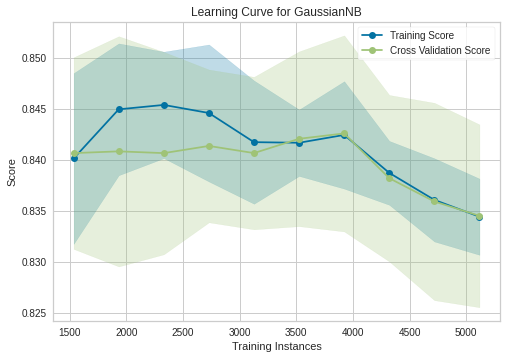

In [25]:
plot_model(estimator=nb, plot="learning")

# **Matriz de confusão**

Matriz das frequências de classificação por classe. Para mais informações: [Aula sobre matriz de confusão](https://www.youtube.com/watch?v=ST4KkxUUAX8&feature=youtu.be)

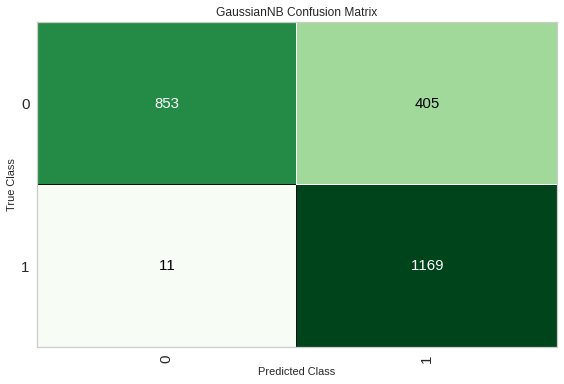

In [26]:
plot_model(estimator = nb, plot = 'confusion_matrix')

# **Curva ROC**

A curva ROC é uma ferramenta baseada nos conceitos de matriz de confusão, utilizada para mensurar um limiar de classificação. Para mais informações: [Aula sobre curva ROC](https://www.youtube.com/watch?v=ST4KkxUUAX8&feature=youtu.be)

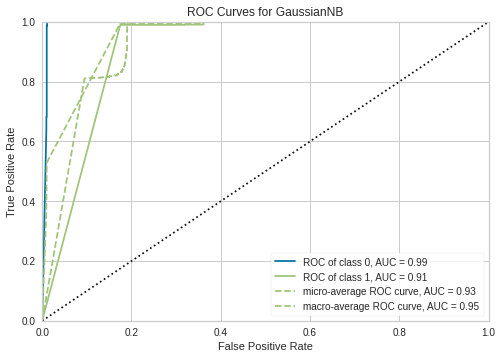

In [27]:
plot_model(estimator=nb, plot='auc')

# **Apresentação da função "evaluete_model"**

Função que apresenta os principais gráficos de avaliação e reprensentação do aprendizado do modelo.



*   Referência: [LINK](https://pycaret.org/classification/)



In [34]:
evaluate_model(nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Predições**

Resposta do modelo em relação aos parâmetros imputados.

In [16]:
predict_model(dt, data=data)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Label,Score
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u,p,1.0
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,e,1.0
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,e,1.0
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,p,1.0
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,e,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l,e,1.0
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l,e,1.0
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l,e,1.0
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l,p,1.0


# **Classificação Multiclasses**

Problemas de classificação caracterizado por conter mais de duas classes.

# **Importando dados**

O Pycaret tem algumas bases de dados para testes, desse modo, iremos utilizar uma base de dados chamada "satellite", que tem como objetivo descobrir a classe de um satélite com base nos seus atributos.

In [35]:
from pycaret.datasets import get_data
data1 = get_data('satellite')

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,Attribute21,Attribute22,Attribute23,Attribute24,Attribute25,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Attribute35,Attribute36,Class
0,80,102,102,79,76,102,102,79,76,102,106,83,76,99,108,85,76,103,118,88,80,107,118,88,79,107,109,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,106,87,76,103,118,88,80,107,118,88,80,112,118,88,79,107,109,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,102,76,80,107,113,85,80,95,100,78,80,95,100,78,79,103,104,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,102,76,80,95,100,78,80,95,100,78,80,91,100,78,79,95,100,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,94,76,80,95,100,78,80,91,100,78,80,91,100,74,79,95,96,75,79,95,100,75,75,95,100,79,4


In [36]:
clfm = setup(data=data1,
             target="Class",
             train_size=0.7,
             numeric_features=['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5',
                              'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10',
                              'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14',
                              'Attribute15', 'Attribute16', 'Attribute17', 'Attribute18',
                              'Attribute19', 'Attribute20', 'Attribute21', 'Attribute22',
                              'Attribute23', 'Attribute24', 'Attribute25', 'Attribute26',
                              'Attribute27', 'Attribute28', 'Attribute29', 'Attribute30',
                              'Attribute31', 'Attribute32', 'Attribute33', 'Attribute34',
                              'Attribute35', 'Attribute36'])

,Description,Value
0,session_id,6260
1,Target,Class
2,Target Type,Multiclass
3,Label Encoded,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 7: 5"
4,Original Data,"(6435, 37)"
5,Missing Values,False
6,Numeric Features,36
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [37]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9190,0.9918,0.8975,0.9186,0.9176,0.8997,0.9000,1.070
et,Extra Trees Classifier,0.9147,0.9914,0.8864,0.9131,0.9118,0.8942,0.8949,0.666
catboost,CatBoost Classifier,0.9136,0.9919,0.8886,0.9124,0.9115,0.8929,0.8935,18.511
rf,Random Forest Classifier,0.9130,0.9908,0.8855,0.9116,0.9102,0.8920,0.8927,1.015
xgboost,Extreme Gradient Boosting,0.9121,0.9910,0.8889,0.9107,0.9105,0.8911,0.8914,4.009
knn,K Neighbors Classifier,0.9010,0.9820,0.8816,0.9017,0.9006,0.8776,0.8778,0.136
gbc,Gradient Boosting Classifier,0.8981,0.9885,0.8707,0.8966,0.8960,0.8738,0.8742,7.801
qda,Quadratic Discriminant Analysis,0.8528,0.9707,0.8039,0.8382,0.8365,0.8169,0.8194,0.029
dt,Decision Tree Classifier,0.8421,0.9048,0.8171,0.8465,0.8438,0.8051,0.8054,0.064
lda,Linear Discriminant Analysis,0.8395,0.9767,0.7788,0.8335,0.8312,0.7998,0.8019,0.040


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6260, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [38]:
model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9335,0.9944,0.9103,0.9333,0.9326,0.9175,0.9178
1,0.9224,0.9912,0.9133,0.9244,0.9228,0.9043,0.9045
2,0.9246,0.9917,0.9065,0.9237,0.9240,0.9067,0.9068
3,0.9180,0.9923,0.8988,0.9199,0.9187,0.8986,0.8987
4,0.9089,0.9900,0.8849,0.9069,0.9072,0.8871,0.8874
5,0.9222,0.9917,0.8891,0.9213,0.9176,0.9033,0.9045
6,0.9067,0.9902,0.8809,0.9054,0.9039,0.8844,0.8850
7,0.9200,0.9913,0.9135,0.9218,0.9206,0.9014,0.9015
8,0.9267,0.9934,0.9024,0.9249,0.9243,0.9090,0.9094
9,0.9067,0.9914,0.8751,0.9042,0.9041,0.8841,0.8846


# **Visualização e avaliação do modelo**

Para a visualização e avaliação do modelo, utilizaremos os diversos recursos da função "evaluate_model".

In [39]:
evaluate_model(estimator=model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **FIM!**

Para mais informações e brincadeiras. [NÃO CLIQUE AQUI](https://pycaret.org/). Divirta-se!